<div style='text-align: center;'>
<a href='https://colab.research.google.com/github/linear-regret/Probabilidad-_II/blob/main/Notebooks_Proba_II/2.Intro_simulacion/1_Categorica.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir en google Colab'/></a>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Ejemplo: ¿A quién preguntarle?

Cuando un profesor le pregunta a sus alumnos, a veces puede agarrar a alguien que le pregunta mucho o incluso a no preguntar a alguien por costumbre. Cómo podríamos programar de forma muy sencilla un código que nos permita pasar por todos los alumnos y no repetir alumno hasta que ya le haya preguntado a todos

![clase](./clase_dalle.webp)


## Simulando de una categórica

La variable aleatoria categórica de $n$ categorías 

$$ X \sim \text{Cat}(p_1,p_2,\ldots, p_n) $$

Modela un experimento con $n$ resultados distintos

<div style='background-color:rgb(126, 51, 225); color:white; padding:10px;'>
    <h2>Pregunta</h2>
    ¿Qué deben de cumplir los parámetros de la función? <br>
    ¿De qúe variable aleatoria es una generalización la categórica? <br>
    Un ejemplo de una variable aleatoria categórica
</div>

In [7]:
lista_nombres_total = ["Ximena", "Carlos","Liz", "Samuel", "Dana", "Jorge", "Cristian", "Carol"]
lista_nombres = np.random.choice(lista_nombres_total, size=6, replace=False)
lista_nombres

array(['Carlos', 'Liz', 'Dana', 'Carol', 'Jorge', 'Samuel'], dtype='<U8')

In [8]:
long_nombres = len(lista_nombres)
arreglo_proba = np.ones(long_nombres) / long_nombres

arreglo_proba

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

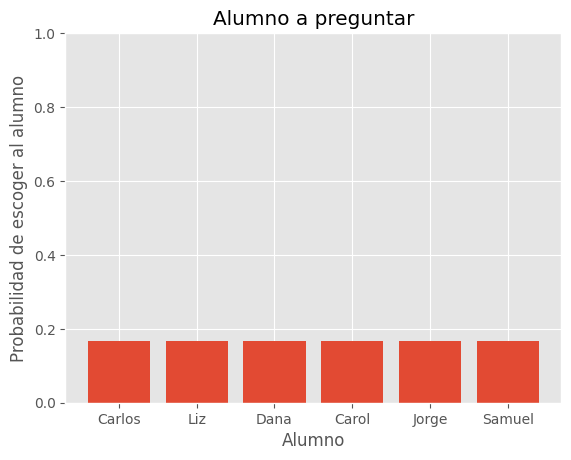

In [9]:
plt.bar(x=lista_nombres,height=arreglo_proba)
plt.ylim(0,1); plt.title('Alumno a preguntar'); plt.ylabel('Probabilidad de escoger al alumno')
plt.xlabel('Alumno')
plt.show()

<div style='background-color:rgb(3, 126, 188) ; color:white; padding:10px;'>
    <h2>Ejercicio (10 min)</h2>
    Crea una función que simule la variable aleatoria categórica con probabilidad uniforme para 3 personas.
</div>

## ¿Cómo simulamos una variable aleatoria de esta distribución?

El problema se puede enunciar como sigue: tenemos $N$ eventos distintos, cada uno con probabilidad $p_i$ (es decir, una distribución categórica). ¿Cómo simulamos este fenómeno aleatorio de modo que el evento $i$-ésimo ocurra con una proporción $p_i$ de las veces?

Sabemos que la probabilidad de que una uniforme caiga en un conjunto del $S\subseteq [0,1]$ está dada por la longitud del conjunto entre la longitud del intervalo. Así sólo tenemos que tomar un conjunto del intervalo unitario que tenga un área de $p_i$ y sabremos que las variables aleatorias caerán ahí en la proporción correcgta que nos deja simular el problema

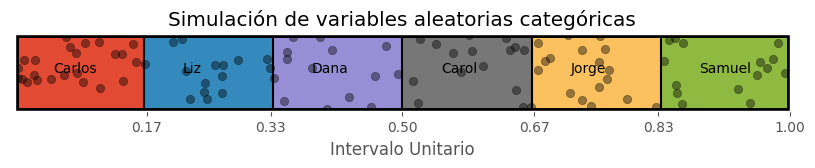

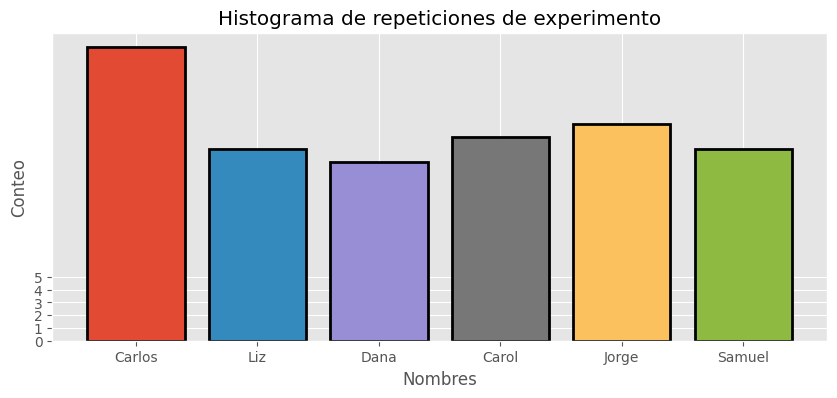

In [18]:
proba_nombres=np.ones(shape=long_nombres).cumsum()/long_nombres
N_sim=100

plt.figure(figsize=(10,1))
plt.fill_between(x=[0,proba_nombres[0]],y1=0,y2=1)

for i in range(long_nombres):
    if i!=long_nombres-1:
        plt.fill_between(x=[proba_nombres[i],proba_nombres[i+1]],y1=0,y2=1)
    plt.annotate(lista_nombres[i], xy=(i/6, 0.5),
             xytext=(i/6 + 0.3/6, 0.5 ))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks((np.ones(shape=long_nombres).cumsum()/long_nombres).round(2))

xi_sim=np.random.random(size=N_sim)

plt.scatter(y=np.abs(np.random.random(size=N_sim)),x=xi_sim,c='k',alpha=0.4)
plt.vlines(x=proba_nombres,ymin=0,ymax=1,colors='k')
plt.yticks([],[])
plt.title('Simulación de variables aleatorias categóricas')
plt.xlabel('Intervalo Unitario')
plt.hlines(y=[0,1],xmin=0,xmax=1,colors='k',linewidth=5)
plt.vlines(x=[0,1],ymin=0,ymax=1,colors='k',linewidth=5)
plt.show()

plt.figure(figsize=(10,4))
conteos=np.zeros(len(lista_nombres))
proba_intervalos=[0]+list(proba_nombres)
for i in range(len(lista_nombres)):
    conteo=sum((proba_intervalos[i]<=xi_sim) & (xi_sim<=proba_intervalos[i+1]))
    conteos[i]=conteo

plt.bar(x=np.arange(6),height=conteos, color=['C0', 'C1', 'C2', 'C3', 'C4','C5'], edgecolor='black',linewidth=2)
plt.xticks(np.arange(6),lista_nombres)
plt.yticks(np.arange(len(lista_nombres)))
plt.ylabel('Conteo')
plt.title('Histograma de repeticiones de experimento')
plt.xlabel('Nombres')
plt.show()

## Simulación de una categórica con una uniforme persona paso por paso

Primero generamos un número al azar de la uniforme

In [19]:
numero_random = np.random.random()
numero_random

0.7055675461489382

Después dado el arreglo de probabilidades de eventos calculamos la probabilidad acumulada que sería sólo las coordenadas de la parte derecha de los cuadros de colores anteriores que dividen el área de cada persona.  

La parte derecha del cuadro que divide a cada persona nos dice en qué momento el evento cambia de uno al otro así podremos ver qué variable aleatoria generar

In [20]:
lista_acum = arreglo_proba.cumsum()
lista_acum

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

Vemos en qué cubeta cae calculando cuál es el primer elemento de la lista acumulada (paredes derechas) al que es menor.

In [21]:
arreglo_booleano = numero_random <= lista_acum
arreglo_booleano

array([False, False, False, False,  True,  True])

Esto nos arroja un índice y podemos decir que este índice es el evento que tenemos

In [22]:
indice_persona = arreglo_booleano.argmax()
indice_persona

4

Regresando del evento al nombre de la persona buscando su índice en el arreglo, tenemos

In [23]:
persona = lista_nombres[indice_persona]
persona

'Jorge'

Todo este código anterior lo podemos poner en unas funciones para realizarlo muchas veces y así simularlo. 

In [24]:
def escoger_persona(arreglo_proba, lista_nombres):
    numero_random = np.random.random()

    lista_acum = arreglo_proba.cumsum()
    arreglo_booleano = numero_random >= lista_acum
    indice_persona = arreglo_booleano.argmin()
    persona = lista_nombres[indice_persona]

    return indice_persona, persona

In [29]:
arreglo_proba = np.ones(long_nombres) / long_nombres
indice, persona = escoger_persona(arreglo_proba, lista_nombres)
indice, persona

(1, 'Liz')

<div style='background-color:rgb(3, 126, 188); color:white; padding:10px;'>
    <h2>Ejercicio</h2>
    Simulen n variables aleatorias categóricas de este experimento
</div>



# Categóricas no uniformes